In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, auc, roc_curve
from sklearn.linear_model import LogisticRegression

In [153]:
pd.set_option('display.max_columns', None)

In [154]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=["TotalCharges"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [155]:
numeric = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
catagorical = df.drop(columns=['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'])

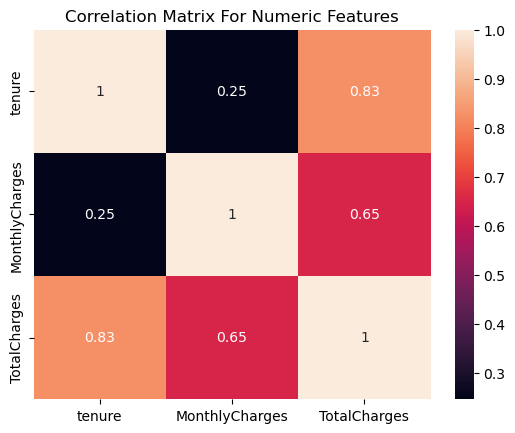

In [156]:
plt.title("Correlation Matrix For Numeric Features")
sns.heatmap(numeric.corr(), annot=True);

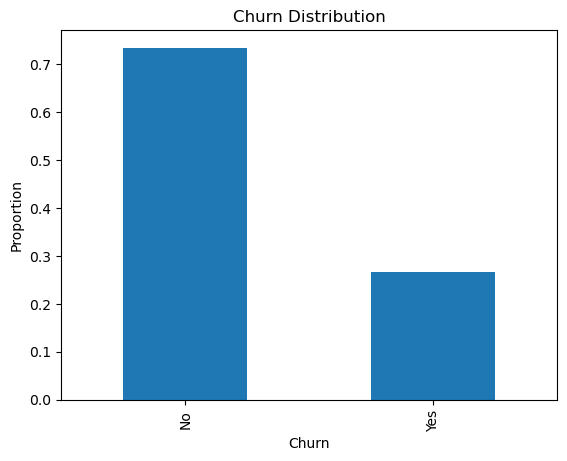

In [157]:
df["Churn"].value_counts(normalize=True).plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Proportion");

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


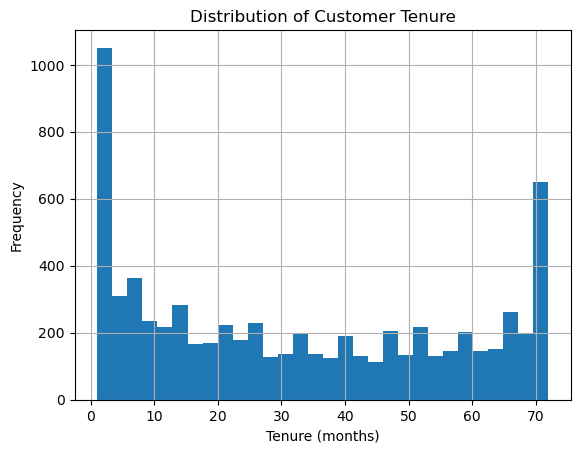

In [158]:
print(df["tenure"].describe())
df["tenure"].hist(bins=30)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency");

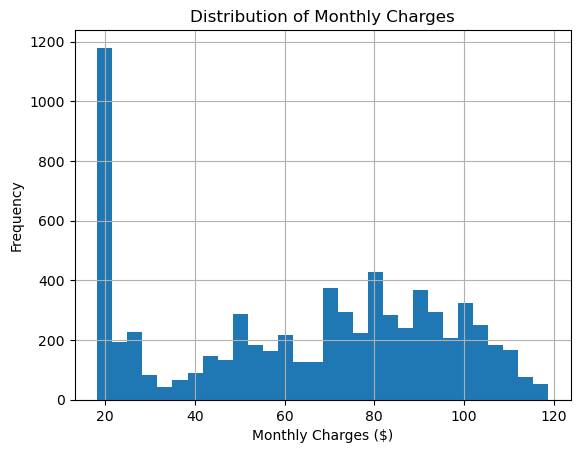

In [159]:
df["MonthlyCharges"].describe()
df["MonthlyCharges"].hist(bins=30)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Frequency");

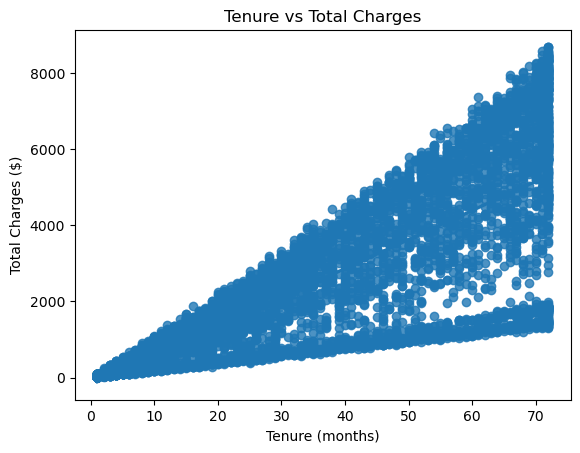

In [160]:
sns.regplot(data=df, x="tenure", y="TotalCharges")
plt.title("Tenure vs Total Charges")
plt.xlabel("Tenure (months)")
plt.ylabel("Total Charges ($)");

In [161]:
df["gender"].value_counts(normalize=True)

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

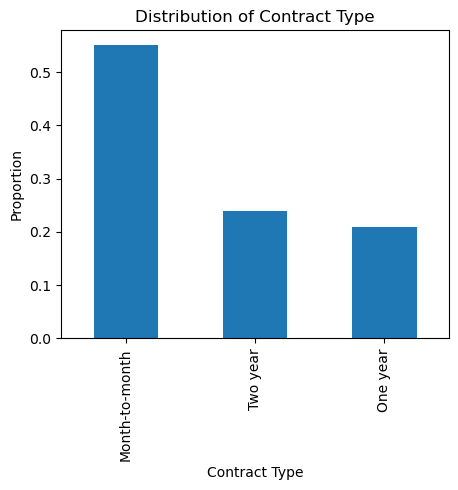

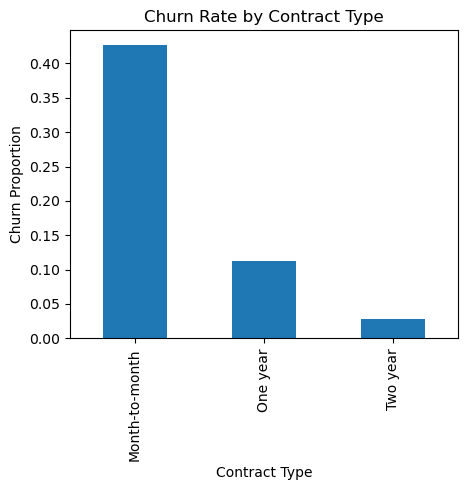

In [162]:
plt.figure(figsize=(5,4))
catagorical["Contract"].value_counts(normalize=True).plot(kind="bar")
plt.title("Distribution of Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Proportion")
plt.show()


df["Churn_num"] = df["Churn"].map({"No":0, "Yes":1})
plt.figure(figsize=(5,4))
df.groupby("Contract")["Churn_num"].mean().plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Proportion")
plt.show()

<Figure size 600x400 with 0 Axes>

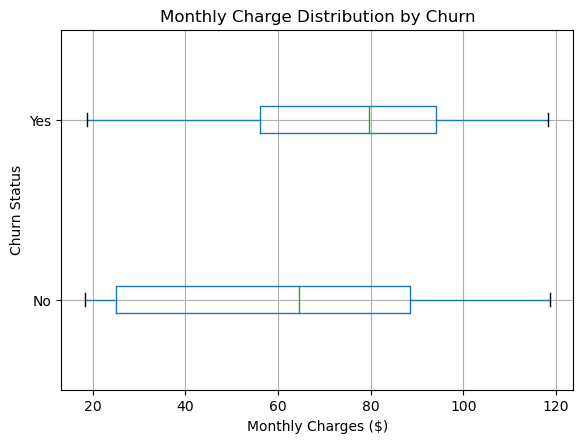

In [163]:
plt.figure(figsize=(6,4))
df.boxplot(column="MonthlyCharges", by="Churn", vert=False)
plt.title("Monthly Charge Distribution by Churn")
plt.suptitle("")  
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Churn Status")
plt.show();

<Figure size 600x400 with 0 Axes>

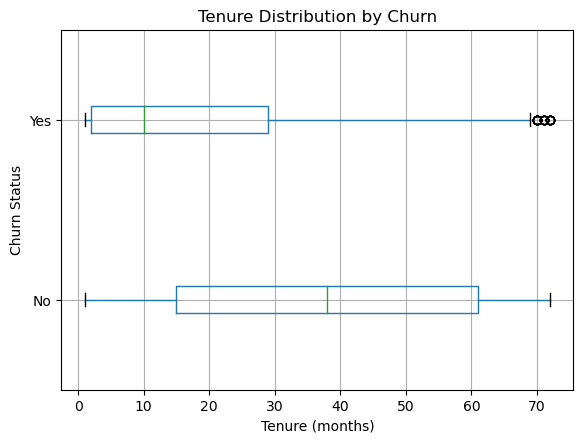

In [164]:
plt.figure(figsize=(6,4))
df.boxplot(column="tenure", by="Churn", vert=False)
plt.title("Tenure Distribution by Churn")
plt.suptitle("") 
plt.xlabel("Tenure (months)")
plt.ylabel("Churn Status")
plt.show()